# Load and Understand the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set styles for better visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [3]:
# --- Load Dataset ---
df = pd.read_csv("../data/creditcard.csv")  # Adjust path if running locally

# --- Basic Overview ---
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Check for Missing Values and Data Types

In [4]:
# Check for nulls
print("Missing values per column:\n", df.isnull().sum())

# Info summary
df.info()

Missing values per column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 

### Class Distribution (Imbalance Check)


Class distribution:
 0    284315
1       492
Name: Class, dtype: int64


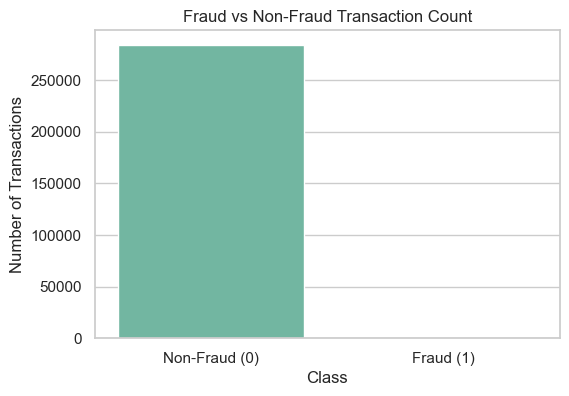

⚠️ Fraudulent transactions ratio: 0.001727 (~0.1727%)


In [5]:
# Class distribution
class_counts = df['Class'].value_counts()
print("\nClass distribution:\n", class_counts)

# Plot distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title("Fraud vs Non-Fraud Transaction Count")
plt.xticks(ticks=[0, 1], labels=["Non-Fraud (0)", "Fraud (1)"])
plt.ylabel("Number of Transactions")
plt.show()

fraud_ratio = class_counts[1] / class_counts.sum()
print(f"⚠️ Fraudulent transactions ratio: {fraud_ratio:.6f} (~{fraud_ratio*100:.4f}%)")

### Description of Features

In [6]:
# Statistical summary
df.describe()

# Columns
print("Columns in dataset:\n", df.columns.tolist())


Columns in dataset:
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


# Exploratory Data Analysis (EDA)

### Distribution of Amount and Time

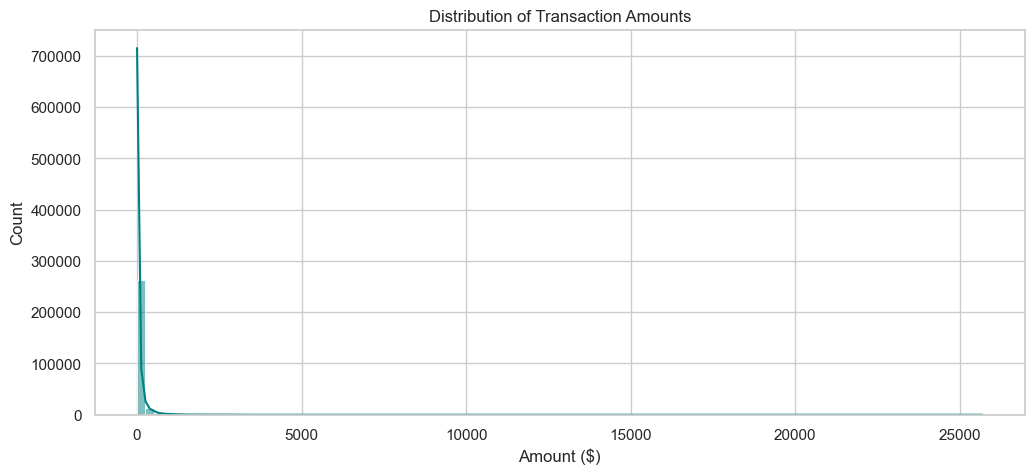

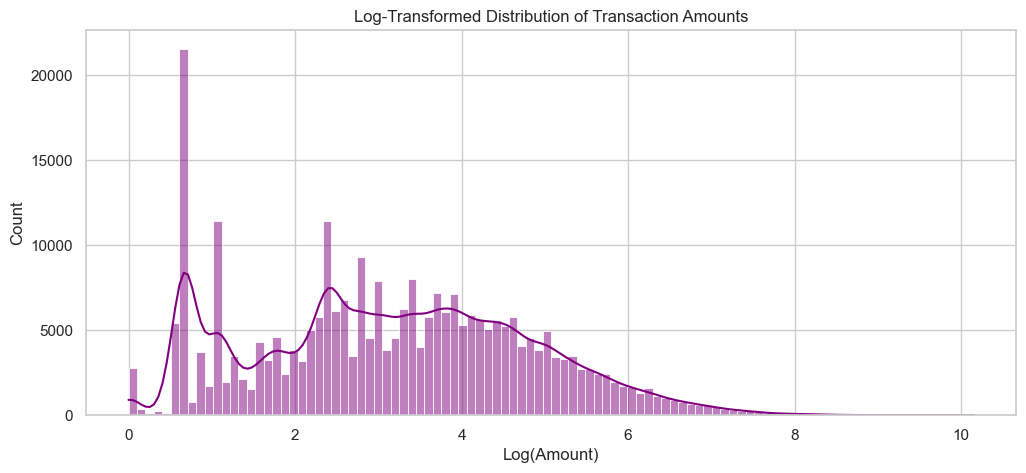

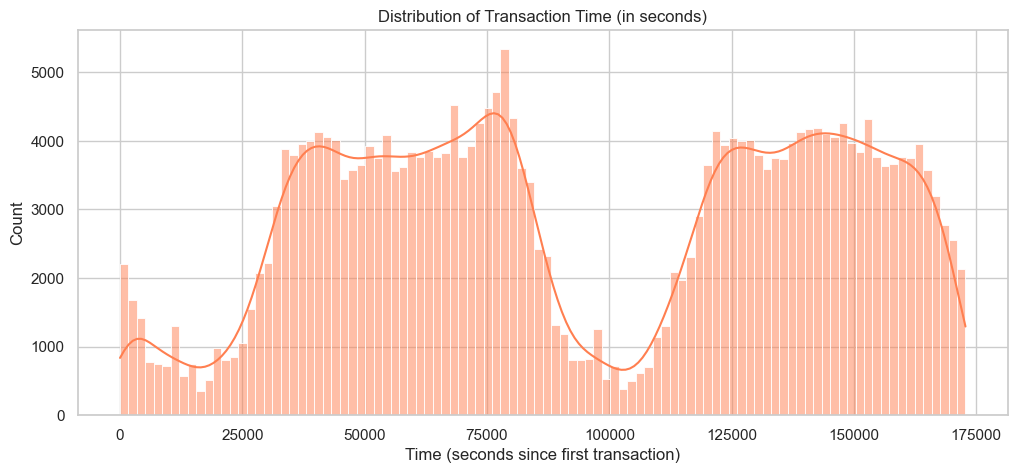

In [7]:
# Distribution of 'Amount'
plt.figure(figsize=(12, 5))
sns.histplot(df['Amount'], bins=100, kde=True, color='teal')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount ($)")
plt.show()

# Log-transformed for better visualization
plt.figure(figsize=(12, 5))
sns.histplot(np.log1p(df['Amount']), bins=100, kde=True, color='purple')
plt.title("Log-Transformed Distribution of Transaction Amounts")
plt.xlabel("Log(Amount)")
plt.show()

# Time feature visualization
plt.figure(figsize=(12, 5))
sns.histplot(df['Time'], bins=100, kde=True, color='coral')
plt.title("Distribution of Transaction Time (in seconds)")
plt.xlabel("Time (seconds since first transaction)")
plt.show()


### Compare Amount for Fraud vs Non-Fraud
python
Copy
Edit


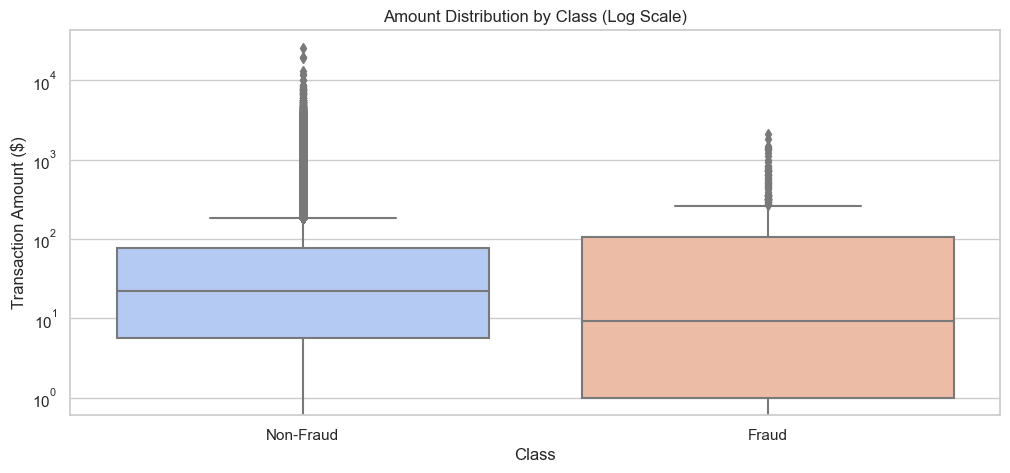

In [8]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='Class', y='Amount', data=df, palette='coolwarm')
plt.yscale('log')
plt.title("Amount Distribution by Class (Log Scale)")
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Transaction Amount ($)")
plt.show()


### Feature Correlation (PCA Components)

Top correlations with fraud label:
 Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64


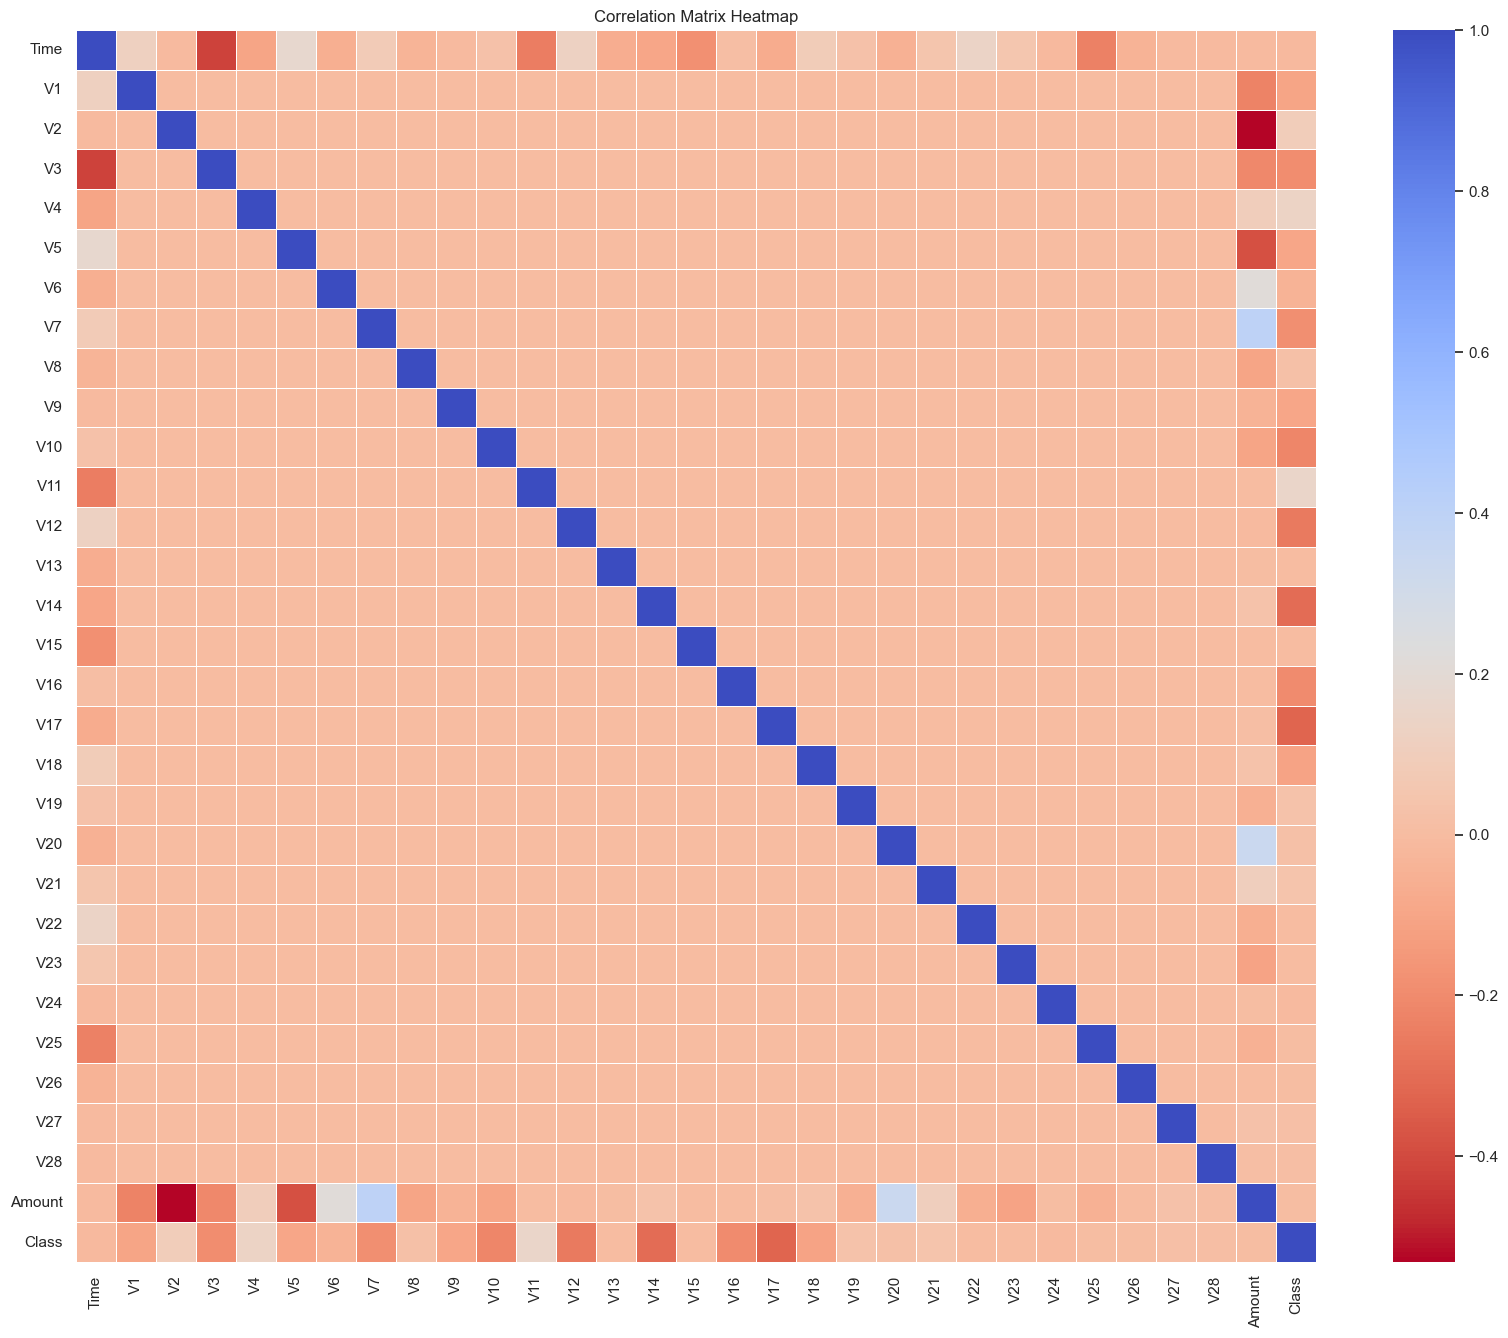

In [9]:
# Correlation matrix
corr_matrix = df.corr()

# Correlation with target
corr_target = corr_matrix["Class"].sort_values(ascending=False)
print("Top correlations with fraud label:\n", corr_target.head(10))

# Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm_r', annot=False, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


### PCA Features Distribution (V1–V28)

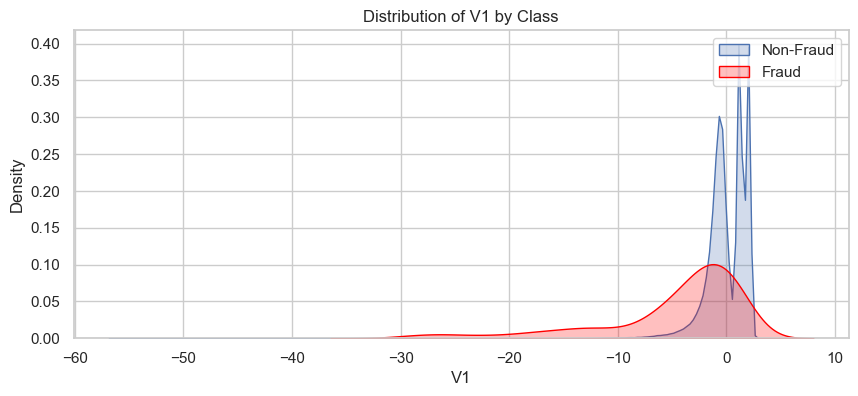

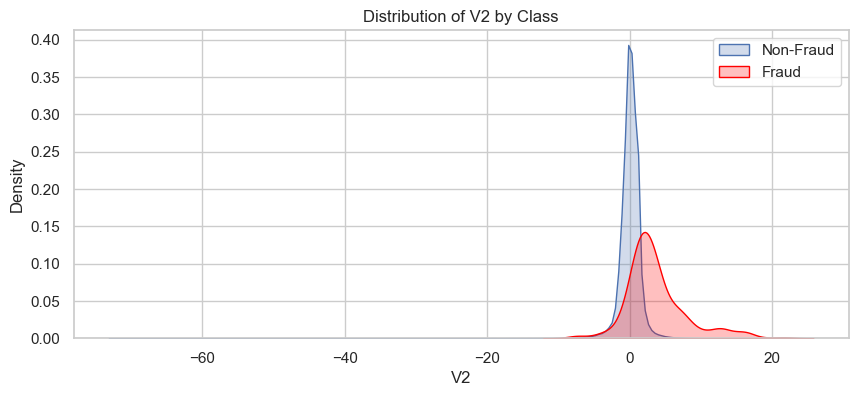

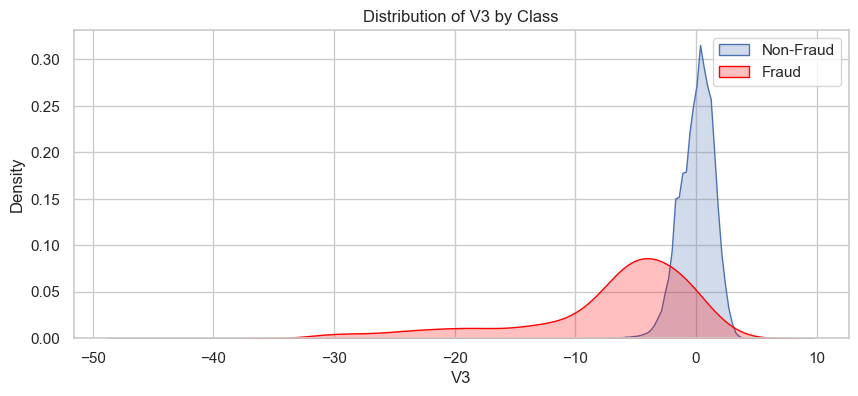

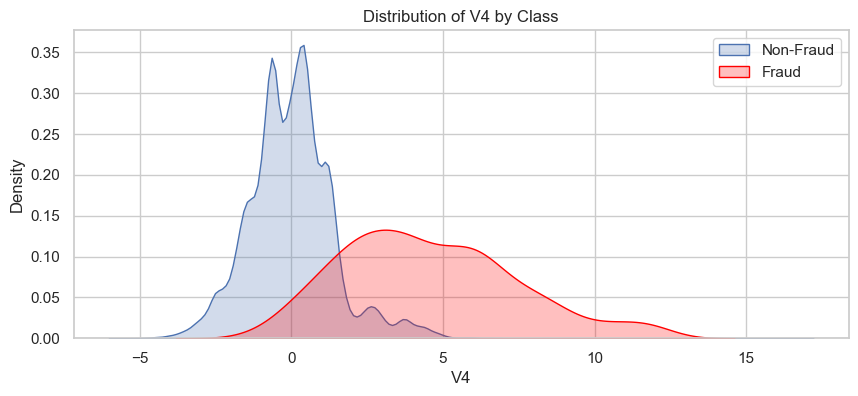

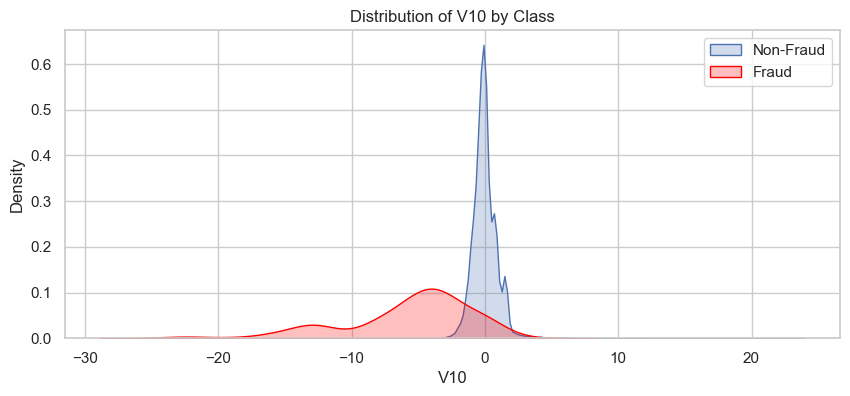

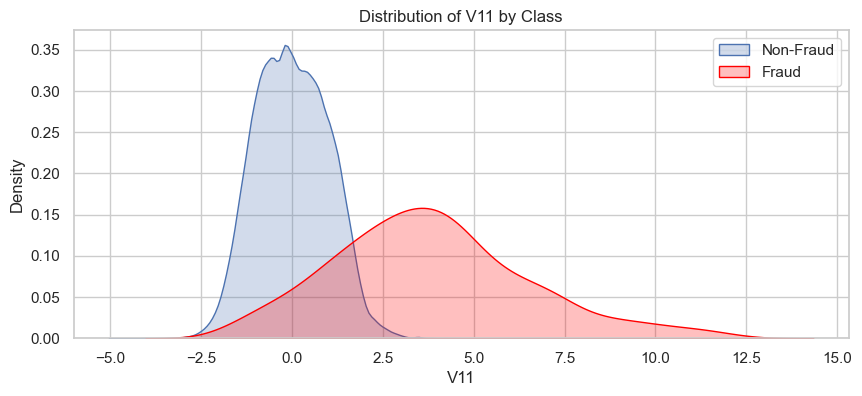

In [10]:
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'V10', 'V11']

for feature in features_to_plot:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(data=df[df['Class'] == 0], x=feature, label='Non-Fraud', fill=True)
    sns.kdeplot(data=df[df['Class'] == 1], x=feature, label='Fraud', fill=True, color='red')
    plt.title(f"Distribution of {feature} by Class")
    plt.legend()
    plt.show()


### Pairplot

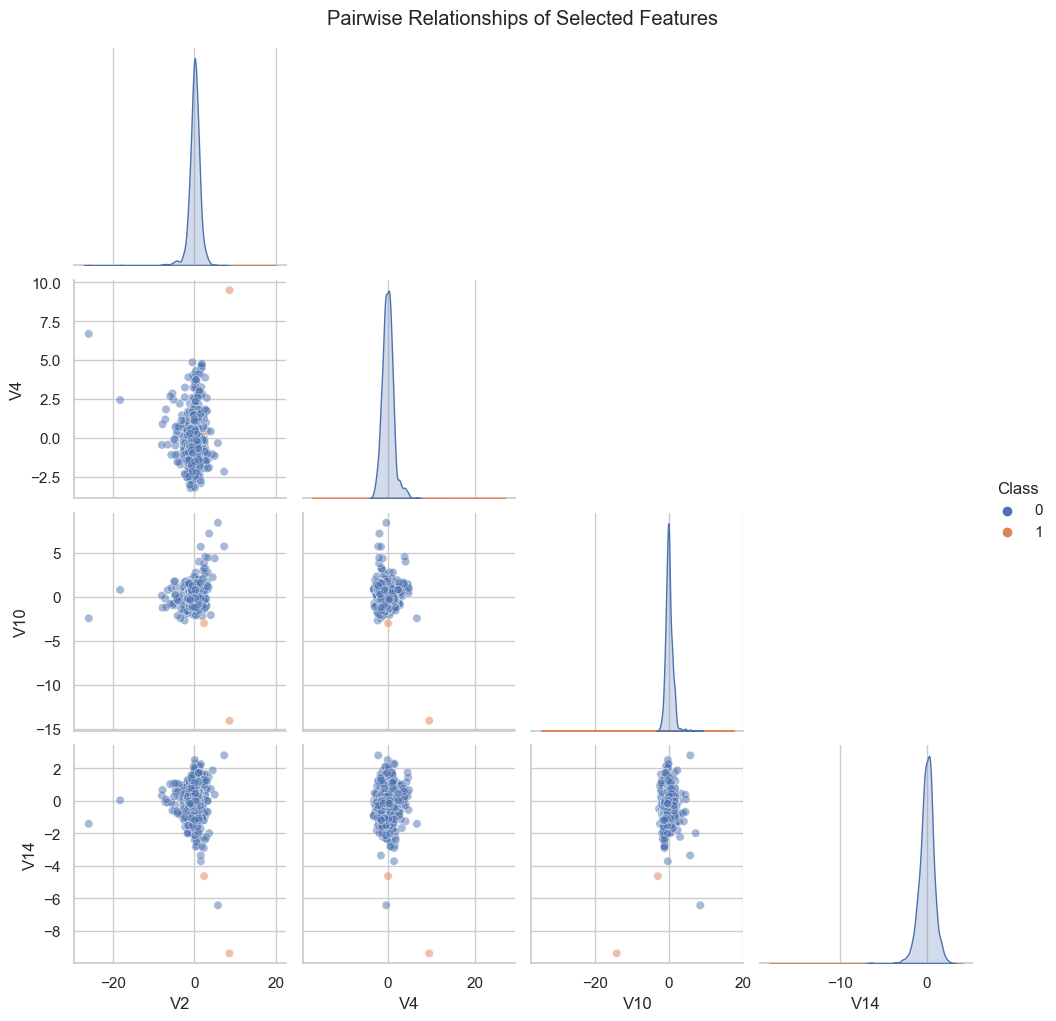

In [11]:
# Sample for faster plotting
sample_df = df.sample(1000, random_state=42)

# Pairplot on selected features
sns.pairplot(sample_df, vars=['V2', 'V4', 'V10', 'V14'], hue='Class', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pairwise Relationships of Selected Features", y=1.02)
plt.show()


# Data Preprocessing

### Feature Scaling (Time, Amount)

In [12]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Create new scaled columns and drop original ones (optional)
df['scaled_amount'] = RobustScaler().fit_transform(df[['Amount']])
df['scaled_time'] = RobustScaler().fit_transform(df[['Time']])

# Drop original columns (optional, since PCA features are already scaled)
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Reorder columns for clarity
scaled_features = ['scaled_time', 'scaled_amount']
all_features = scaled_features + [col for col in df.columns if col not in scaled_features + ['Class']]
df = df[all_features + ['Class']]


### Define Features (X) and Target (y)

In [13]:
# Define X and y
X = df.drop("Class", axis=1)
y = df["Class"]


### Train-Test Split with Stratification

In [14]:
from sklearn.model_selection import train_test_split

# Stratified split (maintains fraud class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Fraud ratio in train: {y_train.mean():.5f}, in test: {y_test.mean():.5f}")


Train shape: (227845, 30), Test shape: (56962, 30)
Fraud ratio in train: 0.00173, in test: 0.00172


### Handling Imbalance with SMOTE

In [15]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"After SMOTE - Train shape: {X_train_smote.shape}")
print(f"Fraud ratio in SMOTE train: {y_train_smote.mean():.5f}")


After SMOTE - Train shape: (454902, 30)
Fraud ratio in SMOTE train: 0.50000


# Baseline Modeling

### Import Libraries

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve,f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### Utility Function: Evaluation & Visualization

In [17]:
def evaluate_model(y_true, y_pred, y_proba, model_name="Model"):
    print(f"\n📊 Classification Report: {model_name}")
    print(classification_report(y_true, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC-AUC
    auc = roc_auc_score(y_true, y_proba)
    fpr, tpr, _ = roc_curve(y_true, y_proba)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

    return auc

### Logistic Regression (Baseline 1)


📊 Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0     0.9999    0.9748    0.9872     56864
           1     0.0591    0.9184    0.1110        98

    accuracy                         0.9747     56962
   macro avg     0.5295    0.9466    0.5491     56962
weighted avg     0.9982    0.9747    0.9857     56962



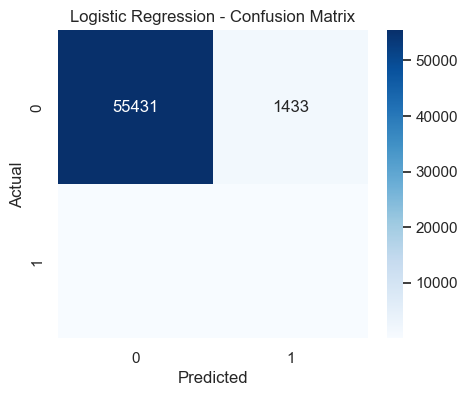

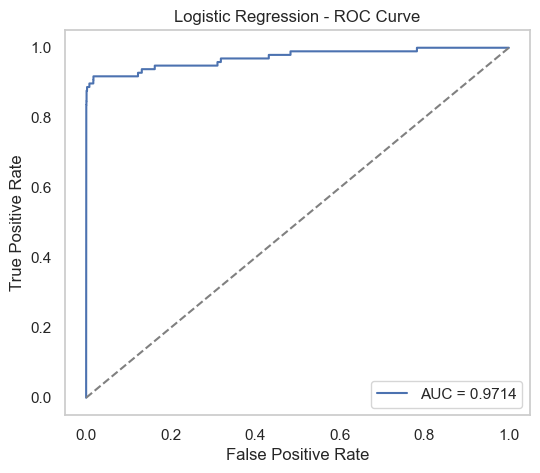

In [18]:
# Train
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_smote, y_train_smote)

# Predict
lr_preds = lr.predict(X_test)
lr_probs = lr.predict_proba(X_test)[:, 1]

# Evaluate
lr_auc = evaluate_model(y_test, lr_preds, lr_probs, model_name="Logistic Regression")


### Decision Tree (Baseline 2)


📊 Classification Report: Decision Tree
              precision    recall  f1-score   support

           0     0.9998    0.9617    0.9804     56864
           1     0.0384    0.8878    0.0736        98

    accuracy                         0.9616     56962
   macro avg     0.5191    0.9247    0.5270     56962
weighted avg     0.9981    0.9616    0.9788     56962



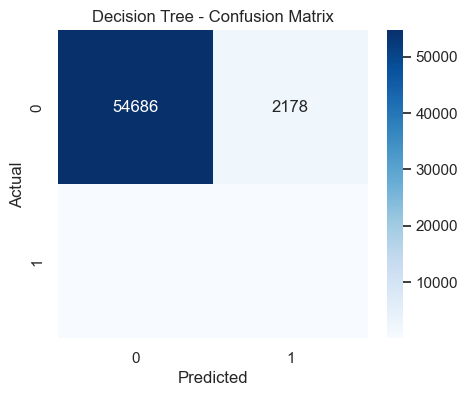

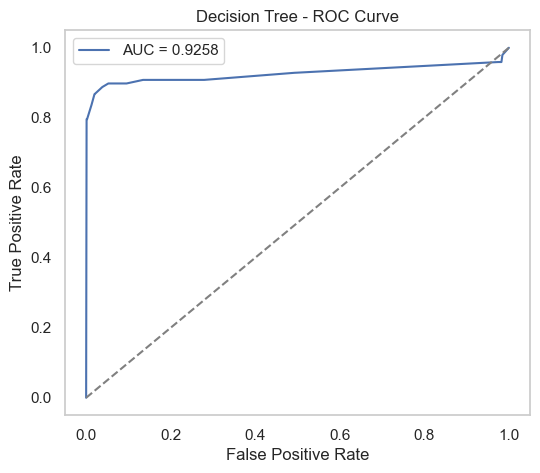

In [19]:
# Train
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_smote, y_train_smote)

# Predict
dt_preds = dt.predict(X_test)
dt_probs = dt.predict_proba(X_test)[:, 1]

# Evaluate
dt_auc = evaluate_model(y_test, dt_preds, dt_probs, model_name="Decision Tree")


# Model Refinement & Hyperparameter Tuning

### Import Libraries

In [20]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

### Random Forest with GridSearchCV

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best RF params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

📊 Classification Report: Random Forest (Tuned)
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8681    0.8061    0.8360        98

    accuracy                         0.9995     56962
   macro avg     0.9339    0.9030    0.9179     56962
weighted avg     0.9994    0.9995    0.9994     56962



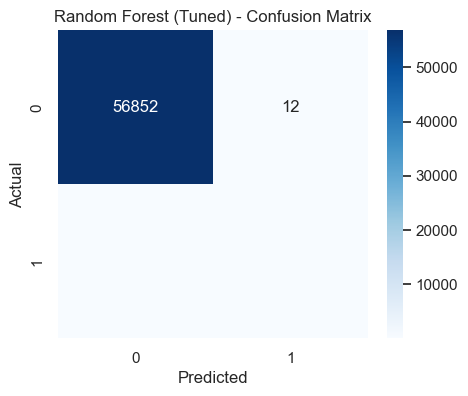

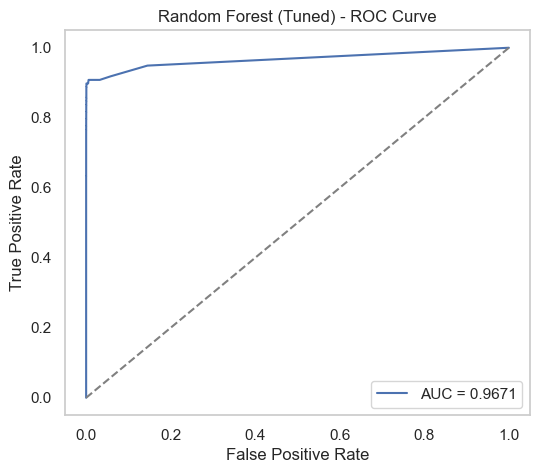

In [21]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    scoring='recall',
    cv=3,
    verbose=1,
    n_jobs=-1
)

rf_grid.fit(X_train_smote, y_train_smote)

# Best model
best_rf = rf_grid.best_estimator_
print("Best RF params:", rf_grid.best_params_)

# Predict
rf_preds = best_rf.predict(X_test)
rf_probs = best_rf.predict_proba(X_test)[:, 1]

# Evaluate
rf_auc = evaluate_model(y_test, rf_preds, rf_probs, model_name="Random Forest (Tuned)")


### XGBoost with GridSearchCV

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best XGB params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}

📊 Classification Report: XGBoost (Tuned)
              precision    recall  f1-score   support

           0     0.9998    0.9989    0.9993     56864
           1     0.5811    0.8776    0.6992        98

    accuracy                         0.9987     56962
   macro avg     0.7904    0.9382    0.8493     56962
weighted avg     0.9991    0.9987    0.9988     56962



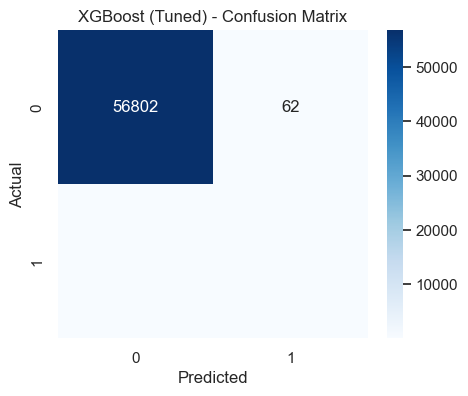

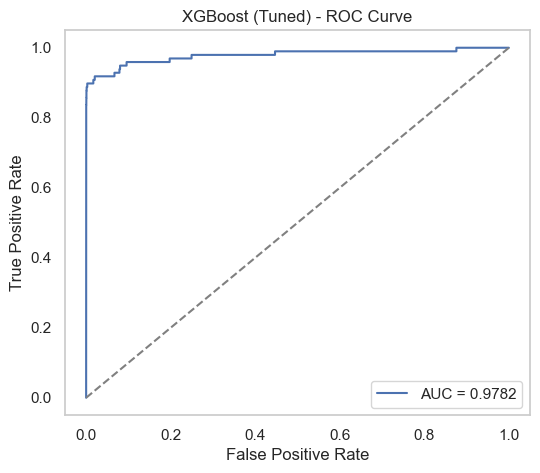

In [22]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42
)

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    scoring='recall',
    cv=3,
    verbose=1,
    n_jobs=-1
)

xgb_grid.fit(X_train_smote, y_train_smote)

# Best model
best_xgb = xgb_grid.best_estimator_
print("Best XGB params:", xgb_grid.best_params_)

# Predict
xgb_preds = best_xgb.predict(X_test)
xgb_probs = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate
xgb_auc = evaluate_model(y_test, xgb_preds, xgb_probs, model_name="XGBoost (Tuned)")

### Feature Importance Plot

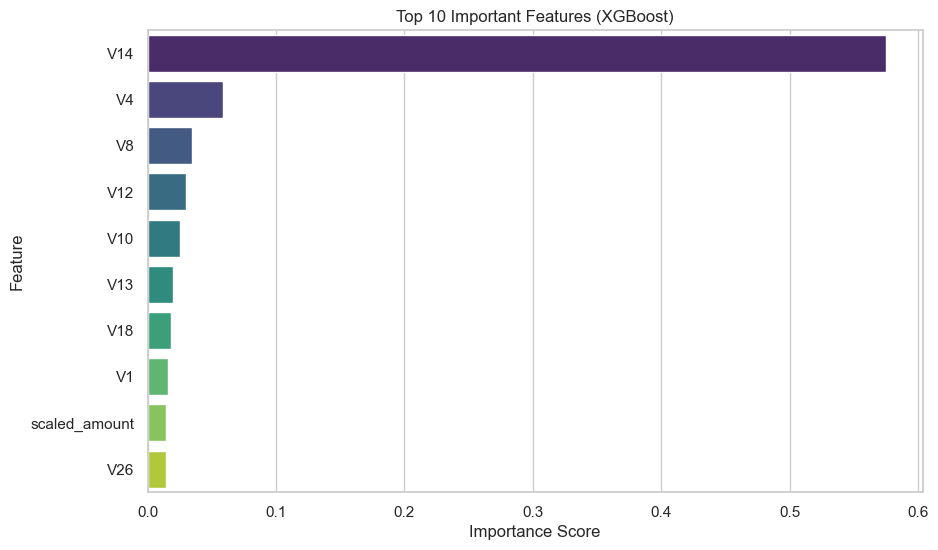

In [23]:
importances = best_xgb.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette='viridis')
plt.title("Top 10 Important Features (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# Threshold Tuning & Final Evaluation

### Tune Threshold Using F1 or Recall

In [26]:
import numpy as np
from sklearn.metrics import recall_score


def tune_threshold(y_true, y_proba):
    thresholds = np.arange(0.0, 1.0, 0.01)
    f1_scores = []
    recalls = []

    for t in thresholds:
        preds = (y_proba >= t).astype(int)
        f1 = f1_score(y_true, preds)
        recall = recall_score(y_true, preds)
        f1_scores.append(f1)
        recalls.append(recall)

    # Plot F1 and Recall vs Threshold
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, f1_scores, label='F1 Score', color='blue')
    plt.plot(thresholds, recalls, label='Recall', color='green')
    plt.axvline(0.5, linestyle='--', color='gray', label='Default Threshold = 0.5')
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Threshold Tuning - F1 & Recall")
    plt.legend()
    plt.grid()
    plt.show()

    best_index = np.argmax(f1_scores)
    best_threshold = thresholds[best_index]
    print(f"\n✅ Best Threshold (Max F1): {best_threshold:.2f}")
    print(f"🔁 Corresponding F1: {f1_scores[best_index]:.4f}, Recall: {recalls[best_index]:.4f}")

    return best_threshold


### Apply on Best Model

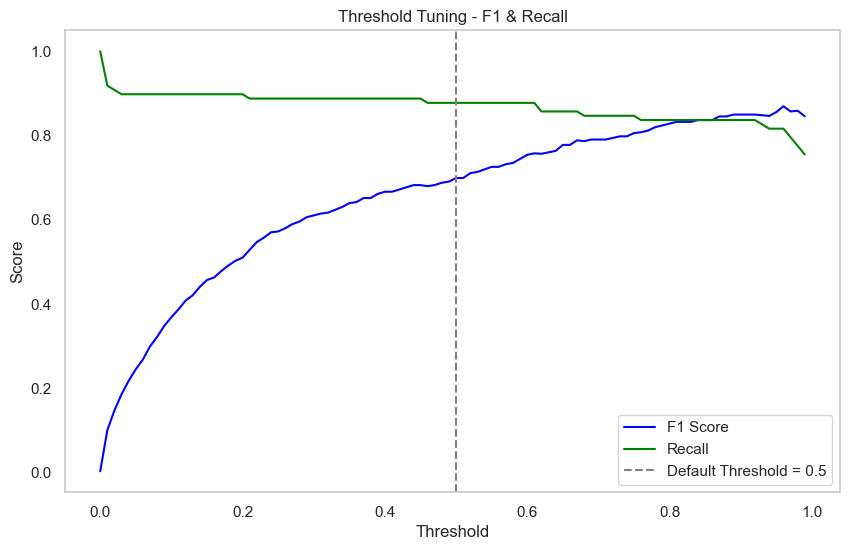


✅ Best Threshold (Max F1): 0.96
🔁 Corresponding F1: 0.8696, Recall: 0.8163

📊 Classification Report: XGBoost (Threshold=0.96)
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9302    0.8163    0.8696        98

    accuracy                         0.9996     56962
   macro avg     0.9650    0.9081    0.9347     56962
weighted avg     0.9996    0.9996    0.9996     56962



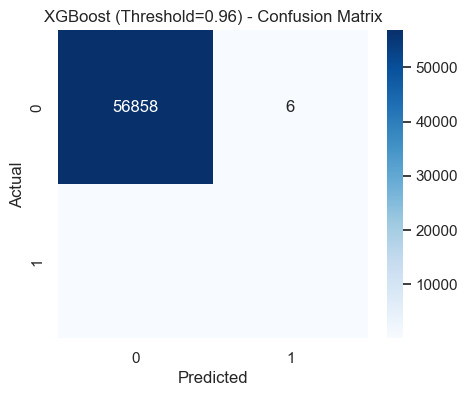

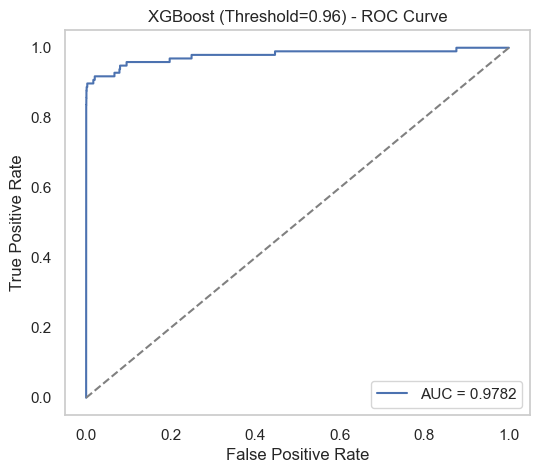

0.9782007625785261

In [27]:

# Tune threshold
best_thresh = tune_threshold(y_test, xgb_probs)

# Predict using tuned threshold
xgb_preds_tuned = (xgb_probs >= best_thresh).astype(int)

# Final Evaluation
evaluate_model(y_test, xgb_preds_tuned, xgb_probs, model_name=f"XGBoost (Threshold={best_thresh:.2f})")


# Save Model & Prepare for Deployment

### Save Final Model & Preprocessor

In [28]:
import joblib
import os
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_smote)

os.makedirs("../model", exist_ok=True)

# Save model
joblib.dump(best_xgb, "../model/fraud_model.pkl")

# Save preprocessor (e.g., scaler)
joblib.dump(scaler, "../model/preprocessor.pkl")

print("✅ Model and scaler saved!")


✅ Model and scaler saved!
